# Microbiota network construction and plotting

## Salmo salar mucosal tissue microbiota across functional feed treatments

#### Load libraries

In [1]:
set.seed(123)
library('dplyr'); packageVersion('dplyr')
library('Matrix'); packageVersion('Matrix')
library('intergraph');packageVersion('intergraph')
library('GGally');packageVersion('GGally')
library('ggnet');packageVersion('ggnet')
library('ggnetwork');packageVersion('ggnetwork')
library('sna');packageVersion('sna')
library('network');packageVersion('network')
library('ggpubr');packageVersion('ggpubr')
library('igraph');packageVersion('igraph')
library('seqtime'); packageVersion('seqtime')
library('SpiecEasi'); packageVersion('SpiecEasi')
library('phyloseq'); packageVersion('phyloseq')
library('RColorBrewer');packageVersion('RColorBrewer')
library('CINNA');packageVersion('CINNA')

Warning message:
“package ‘dplyr’ was built under R version 4.0.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] ‘1.0.7’

Warning message:
“package ‘Matrix’ was built under R version 4.0.2”


[1] ‘1.3.4’

[1] ‘2.0.2’

Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 4.0.2”
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



[1] ‘2.1.2’


Attaching package: ‘ggnet’


The following objects are masked from ‘package:GGally’:

    ggnet, ggnet2




[1] ‘0.1.0’

Warning message:
“package ‘ggnetwork’ was built under R version 4.0.2”


[1] ‘0.5.10’

Warning message:
“package ‘sna’ was built under R version 4.0.2”
Loading required package: statnet.common

Warning message:
“package ‘statnet.common’ was built under R version 4.0.2”

Attaching package: ‘statnet.common’


The following objects are masked from ‘package:base’:

    attr, order


Loading required package: network

Warning message:
“package ‘network’ was built under R version 4.0.2”

‘network’ 1.17.1 (2021-06-12), part of the Statnet Project
* ‘news(package="network")’ for changes since last version
* ‘citation("network")’ for citation information
* ‘https://statnet.org’ for help, support, and other information


sna: Tools for Social Network Analysis
Version 2.6 created on 2020-10-5.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
 For citation information, type citation("sna").
 Type help(package="sna") to get started.




[1] ‘2.6’

[1] ‘1.17.1’

Warning message:
“package ‘ggpubr’ was built under R version 4.0.2”


[1] ‘0.4.0’

Warning message:
“package ‘igraph’ was built under R version 4.0.2”

Attaching package: ‘igraph’


The following objects are masked from ‘package:sna’:

    betweenness, bonpow, closeness, components, degree, dyad.census,
    evcent, hierarchy, is.connected, neighborhood, triad.census


The following objects are masked from ‘package:network’:

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribute, set.vertex.attribute


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




[1] ‘1.2.9’

Loading required package: vegan

Warning message:
“package ‘vegan’ was built under R version 4.0.2”
Loading required package: permute


Attaching package: ‘permute’


The following object is masked from ‘package:igraph’:

    permute


Loading required package: lattice

Warning message:
“package ‘lattice’ was built under R version 4.0.2”
This is vegan 2.5-7


Attaching package: ‘vegan’


The following object is masked from ‘package:igraph’:

    diversity


Registered S3 method overwritten by 'untb':
  method       from 
  plot.preston vegan


seqtime: Time Series Analysis of Sequencing Data


Attaching package: ‘seqtime’


The following object is masked from ‘package:igraph’:

    normalize




[1] ‘0.1.1’


Attaching package: ‘SpiecEasi’


The following object is masked from ‘package:igraph’:

    make_graph


The following objects are masked from ‘package:Matrix’:

    tril, triu




[1] ‘1.1.0’

[1] ‘1.32.0’

[1] ‘1.1.2’

Warning message:
“package ‘CINNA’ was built under R version 4.0.2”
Registered S3 method overwritten by 'dendextend':
  method     from 
  rev.hclust vegan



[1] ‘1.1.55’

#### Parse data into tissue specific datasets

In [2]:
psFish1f <- readRDS('psFish1f.RDS')
psFish1f

psGut <- prune_samples(sample_data(psFish1f)$Tissue %in% c('Gut'), psFish1f)
psGut

psGill <- prune_samples(sample_data(psFish1f)$Tissue %in% c('Gill'), psFish1f)
psGill

psSkin <- prune_samples(sample_data(psFish1f)$Tissue %in% c('Skin'), psFish1f)
psSkin

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2378 taxa and 209 samples ]
sample_data() Sample Data:       [ 209 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 2378 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2378 tips and 2377 internal nodes ]
refseq()      DNAStringSet:      [ 2378 reference sequences ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2378 taxa and 68 samples ]
sample_data() Sample Data:       [ 68 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 2378 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2378 tips and 2377 internal nodes ]
refseq()      DNAStringSet:      [ 2378 reference sequences ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2378 taxa and 69 samples ]
sample_data() Sample Data:       [ 69 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 2378 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2378 tips and 2377 internal nodes ]
refseq()      DNAStringSet:      [ 2378 reference sequences ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2378 taxa and 72 samples ]
sample_data() Sample Data:       [ 72 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 2378 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2378 tips and 2377 internal nodes ]
refseq()      DNAStringSet:      [ 2378 reference sequences ]

#### Filter out spurious ASVs from each dataset (0.0001% abundance)

In [3]:
psFishR <- transform_sample_counts(psFish1f, function(x) x / sum(x))
psFishRF <- filter_taxa(psFishR, function(x) mean(x)  > 0.0001, TRUE)
psFishF <- prune_taxa(taxa_names(psFishRF), psFish1f)
psFishF

psGutR <- transform_sample_counts(psGut, function(x) x / sum(x))
psGutRF <- filter_taxa(psGutR, function(x) mean(x)  > 0.0001, TRUE)
psGutF <- prune_taxa(taxa_names(psGutRF), psGut)
psGutF
                      
psGillR <- transform_sample_counts(psGill, function(x) x / sum(x))
psGillRF <- filter_taxa(psGillR, function(x) mean(x)  > 0.0001, TRUE)
psGillF <- prune_taxa(taxa_names(psGillRF), psGill)
psGillF 
                       
psSkinR <- transform_sample_counts(psSkin, function(x) x / sum(x))
psSkinRF <- filter_taxa(psSkinR, function(x) mean(x)  > 0.0001, TRUE)
psSkinF <- prune_taxa(taxa_names(psSkinRF), psSkin)
psSkinF     

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 898 taxa and 209 samples ]
sample_data() Sample Data:       [ 209 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 898 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 898 tips and 897 internal nodes ]
refseq()      DNAStringSet:      [ 898 reference sequences ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 281 taxa and 68 samples ]
sample_data() Sample Data:       [ 68 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 281 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 281 tips and 280 internal nodes ]
refseq()      DNAStringSet:      [ 281 reference sequences ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1009 taxa and 69 samples ]
sample_data() Sample Data:       [ 69 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 1009 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1009 tips and 1008 internal nodes ]
refseq()      DNAStringSet:      [ 1009 reference sequences ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 888 taxa and 72 samples ]
sample_data() Sample Data:       [ 72 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 888 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 888 tips and 887 internal nodes ]
refseq()      DNAStringSet:      [ 888 reference sequences ]

## Construct/infer network for each tissue and full dataset

#### Read in saved networks to avoid re-computation 

In [4]:
se.mb.Fish <- readRDS('networks/se.mb.Fish')
ig.mbFish <- readRDS('networks/ig.mbFish')

se.mb.Gut <- readRDS('networks/se.mb.Gut')
ig.mbGut <- readRDS('networks/ig.mbGut')

se.mb.Gill <- readRDS('networks/se.mb.Gill')
ig.mbGill <- readRDS('networks/ig.mbGill')

se.mb.Skin <- readRDS('networks/se.mb.Skin')
ig.mbSkin <- readRDS('networks/ig.mbSkin')

#### Plot summary stats of networks

In [5]:
elist.mbFish <- summary(symBeta(getOptBeta(se.mb.Fish), mode='maxabs'))
pdf('networks/AllTissue_edgeweigths.pdf')
hist(elist.mbFish[,3], main='All Tissues', xlab='edge weights')
dev.off()
dd.mbFish <- degree.distribution(ig.mbFish)
pdf('networks/AllTissue_degreefreq.pdf')
plot(0:(length(dd.mbFish)-1), dd.mbFish , ylim=c(0,.35), type='b',
       ylab="Frequency", xlab="Degree", main="All Tissue Degree Distributions")
dev.off()

elist.mbGut <- summary(symBeta(getOptBeta(se.mb.Gut), mode='maxabs'))
pdf('networks/Gut_edgeweigths.pdf')
hist(elist.mbGut[,3], main='Gut', xlab='edge weights')
dev.off()
dd.mbGut <- degree.distribution(ig.mbGut)
pdf('networks/Gut_degreefreq.pdf')
plot(0:(length(dd.mbGut)-1), dd.mbGut , ylim=c(0,.35), type='b',
      ylab="Frequency", xlab="Degree", main="Gut Degree Distributions")
dev.off()

elist.mbGill <- summary(symBeta(getOptBeta(se.mb.Gill), mode='maxabs'))
pdf('networks/Gill_edgeweigths.pdf')
hist(elist.mbGill[,3], main='Gill', xlab='edge weights')
dev.off()
dd.mbGill <- degree.distribution(ig.mbGill)
pdf('networks/Gill_degreefreq.pdf')
plot(0:(length(dd.mbGill)-1), dd.mbGill , ylim=c(0,.35), type='b',
       ylab="Frequency", xlab="Degree", main="Gill Degree Distributions")
dev.off()

elist.mbSkin <- summary(symBeta(getOptBeta(se.mb.Skin), mode='maxabs'))
pdf('networks/Skin_edgeweigths.pdf')
hist(elist.mbSkin[,3], main='Skin', xlab='edge weights')
dev.off()
dd.mbSkin <- degree.distribution(ig.mbSkin)
pdf('networks/Skin_degreefreq.pdf')
plot(0:(length(dd.mbSkin)-1), dd.mbSkin , ylim=c(0,.35), type='b',
       ylab="Frequency", xlab="Degree", main="Skin Degree Distributions")
dev.off()

pdf 
  2

pdf 
  2

pdf 
  2

pdf 
  2

pdf 
  2

pdf 
  2

pdf 
  2

pdf 
  2

### Run CINNA to determine ideal measure of centrality

 [1] "subgraph centrality scores"                      
 [2] "Topological Coefficient"                         
 [3] "Average Distance"                                
 [4] "Barycenter Centrality"                           
 [5] "BottleNeck Centrality"                           
 [6] "Centroid value"                                  
 [7] "Closeness Centrality (Freeman)"                  
 [8] "ClusterRank"                                     
 [9] "Decay Centrality"                                
[10] "Degree Centrality"                               
[11] "Diffusion Degree"                                
[12] "DMNC - Density of Maximum Neighborhood Component"
[13] "Eccentricity Centrality"                         
[14] "Harary Centrality"                               
[15] "eigenvector centralities"                        
[16] "K-core Decomposition"                            
[17] "Geodesic K-Path Centrality"                      
[18] "Katz Centrality (Katz Status Index)"      

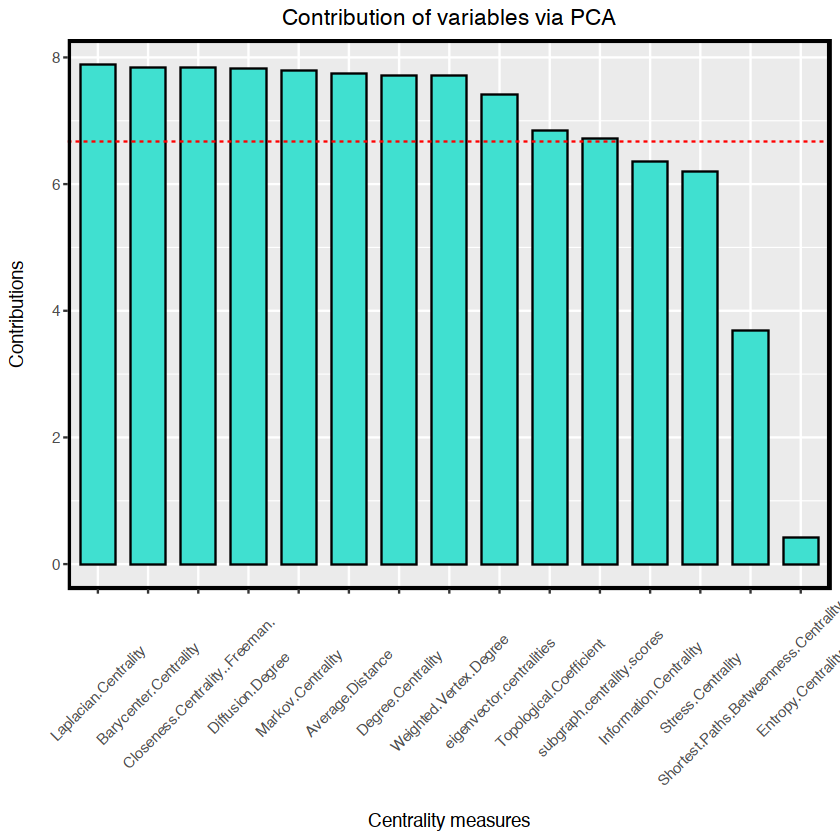

 [1] "subgraph centrality scores"                      
 [2] "Topological Coefficient"                         
 [3] "Average Distance"                                
 [4] "Barycenter Centrality"                           
 [5] "BottleNeck Centrality"                           
 [6] "Centroid value"                                  
 [7] "Closeness Centrality (Freeman)"                  
 [8] "ClusterRank"                                     
 [9] "Decay Centrality"                                
[10] "Degree Centrality"                               
[11] "Diffusion Degree"                                
[12] "DMNC - Density of Maximum Neighborhood Component"
[13] "Eccentricity Centrality"                         
[14] "Harary Centrality"                               
[15] "eigenvector centralities"                        
[16] "K-core Decomposition"                            
[17] "Geodesic K-Path Centrality"                      
[18] "Katz Centrality (Katz Status Index)"      

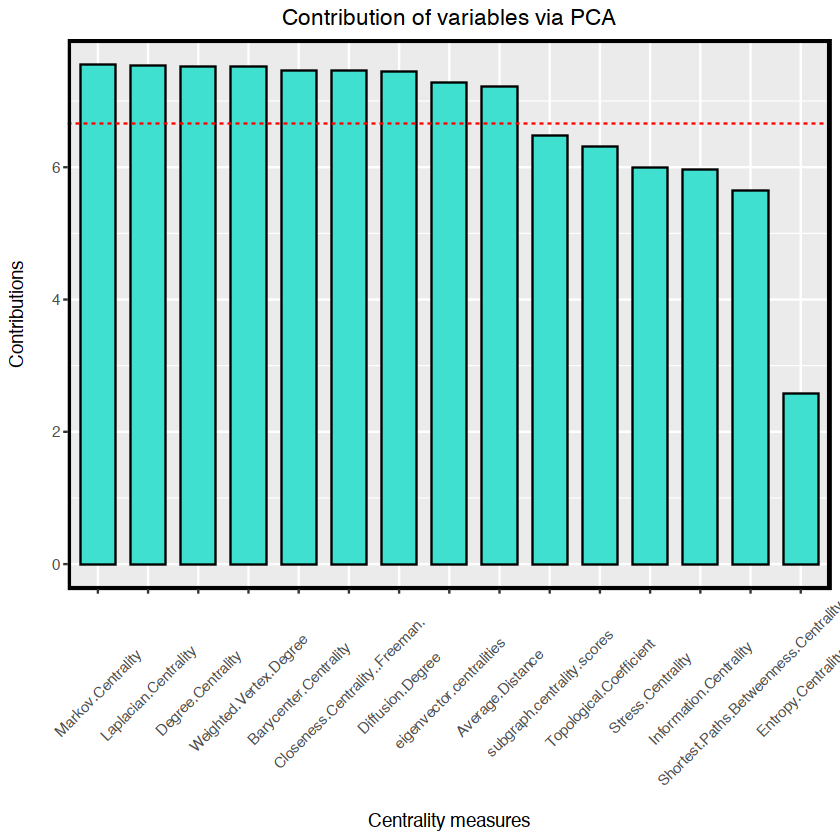

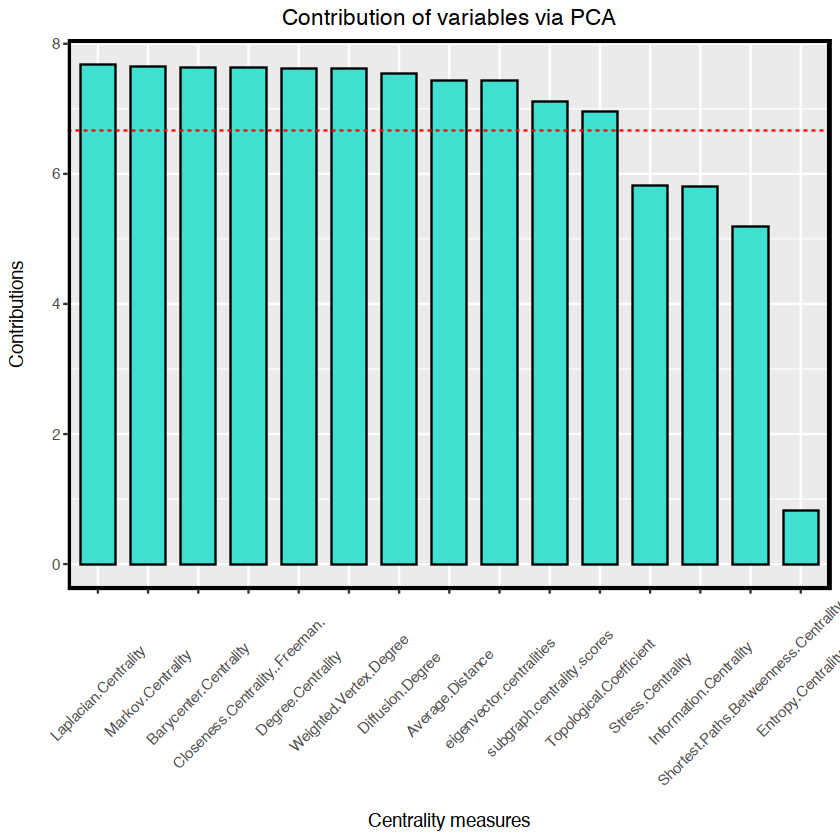

In [6]:
cents <- c(1,2,3,4,7,10,11,15,24,26,30,32,34,41,44,50)
cal_centFish <- calculate_centralities(ig.mbFish, include = proper_centralities(ig.mbFish)[cents])
centPCAFish <- cal_centFish %>% pca_centralities(scale.unit = TRUE)
centPCAFish

# Gut igraph is not fully connected and errors out
#cal_centGut <- calculate_centralities(ig.mbGut, include = proper_centralities(ig.mbGut)[cents])
#centPCAGut <- cal_centGut %>% pca_centralities(scale.unit = TRUE)
#centPCAGut

cal_centGill <- calculate_centralities(ig.mbGill, include = proper_centralities(ig.mbGill)[cents])
centPCAGill <- cal_centGill %>% pca_centralities(scale.unit = TRUE)
centPCAGill

cal_centSkin <- calculate_centralities(ig.mbSkin, include = proper_centralities(ig.mbSkin)[cents])
centPCASkin <- cal_centSkin %>% pca_centralities(scale.unit = TRUE)
centPCASkin

### Calculate degree and laplacian centralities and test correlations

In [7]:
dgFish <- degree(ig.mbFish)
lpFish <- centiserve::laplacian(ig.mbFish)
cor(lpFish,dgFish)

dgGut <- degree(ig.mbGut)
lpGut <- centiserve::laplacian(ig.mbGut)
cor(lpGut, dgGut)

dgGill <- degree(ig.mbGill)
lpGill <- centiserve::laplacian(ig.mbGill)
cor(lpGill, dgGill)

dgSkin <- degree(ig.mbSkin)
lpSkin <- centiserve::laplacian(ig.mbSkin)
cor(lpSkin, dgSkin)

[1] 0.9778394

[1] 0.9624698

[1] 0.9829298

[1] 0.9823456

#### Pull out most highly connected nodes from each network according to laplacian centrality and get taxonomy

In [8]:
gutLP <- data.frame(slice_max(as.data.frame(lpGut), lpGut, n=50), Tissue = 'Gut')
gutLP$taxa <- tax_table(psGut)[row.names(gutLP)]
write.csv(gutLP, 'networks/GutTopNodes_Laplacian.csv')

gillLP <- data.frame(slice_max(as.data.frame(lpGill), lpGill, n=50), Tissue = 'Gill')
gillLP$taxa <- tax_table(psGill)[row.names(gillLP)]
write.csv(gillLP, 'networks/GillTopNodes_Laplacian.csv')

skinLP <- data.frame(slice_max(as.data.frame(lpSkin), lpSkin, n=50), Tissue = 'Skin')
skinLP$taxa <- tax_table(psSkin)[row.names(skinLP)]
write.csv(skinLP, 'networks/SkinTopNodes_Laplacian.csv')

fishLP <- data.frame(slice_max(as.data.frame(lpFish), lpFish, n=50), Tissue = 'Fish')
fishLP$taxa <- tax_table(psFish1f)[row.names(fishLP)]
write.csv(fishLP, 'networks/FishTopNodes_Laplacian.csv')


#### Make a phylum color palette so that all networks are colored the same

In [9]:
library('RColorBrewer')
my_colors <- colorRampPalette(brewer.pal(name="Paired", n = 12))(15)
PhylumPalette <- scale_color_manual(values = c('Acidobacteria' = my_colors[1],
                                               'Actinobacteria' = my_colors[2],
                                               'Bacteroidetes' = my_colors[3], 
                                               'Chloroflexi' = my_colors[4],
                                               'Epsilonbacteraeota' = my_colors[5],
                                               'Firmicutes' = my_colors[6],
                                               'Fusobacteria' = my_colors[7],
                                               'Gemmatimonadetes' = my_colors[8],
                                               'Nitrospinae' = my_colors[9],
                                               'Nitrospirae' = my_colors[10], 
                                               'Patescibacteria' = my_colors[11],
                                               'Planctomycetes' = my_colors[12],
                                               'Proteobacteria' = my_colors[13],
                                               'Tenericutes' = my_colors[14],
                                               'Verrucomicrobia' = my_colors[15]))

## Plot networks - show only the top 50 nodes in each network

### Skin Network Plot

##### Get the size of the 50th most connected node (laplacian) to filter plots to top nodes

In [10]:
tail(lpSkin[order(lpSkin)], 50)[1]

ASV1900 
   2730

In [11]:
col_vector74 = c("#7FC97F","#BEAED4","#FDC086","#FFFF99","#386CB0","#F0027F","#BF5B17","#666666","#1B9E77","#D95F02","#7570B3","#E7298A","#66A61E","#E6AB02","#A6761D","#666666","#A6CEE3","#1F78B4","#B2DF8A","#33A02C","#FB9A99","#E31A1C","#FDBF6F","#FF7F00","#CAB2D6","#6A3D9A","#FFFF99","#B15928","#FBB4AE","#B3CDE3","#CCEBC5","#DECBE4","#FED9A6","#FFFFCC","#E5D8BD","#FDDAEC","#F2F2F2","#B3E2CD","#FDCDAC","#CBD5E8","#F4CAE4","#E6F5C9","#FFF2AE","#F1E2CC","#CCCCCC","#E41A1C","#377EB8","#4DAF4A","#984EA3","#FF7F00","#FFFF33","#A65628","#F781BF","#999999","#66C2A5","#FC8D62","#8DA0CB","#E78AC3","#A6D854","#FFD92F","#E5C494","#B3B3B3","#8DD3C7","#FFFFB3","#BEBADA","#FB8072","#80B1D3","#FDB462","#B3DE69","#FCCDE5","#D9D9D9","#BC80BD","#CCEBC5","#FFED6F")
getrank="Phylum" ## Note that depending on your object this could be "Class" or "Genus"...

# Add edged colors based on nodes connected
#The inverse covariance matrix is obtained via a form of regression
betaMat=as.matrix(symBeta(getOptBeta(se.mb.Skin)))

#otu.ids=colnames(mb$data)
otu.ids <- colnames(se.mb.Skin[[1]]$data)

edges=E(ig.mbSkin)
edge.colors=c()
edge.weight=c()
    for(e.index in 1:length(edges)){
  adj.nodes=ends(ig.mbSkin,edges[e.index])
  xindex=which(otu.ids==adj.nodes[1])
  yindex=which(otu.ids==adj.nodes[2])
  beta=betaMat[xindex,yindex]
  if(beta>0){
    edge.colors<-append(edge.colors,"green3")
    #edge.weight= format(beta*100,digits=3)
    weight= format(beta*100,digits=3)
    edge.weight<-append(edge.weight,weight)
    #cat("Beta pos:",beta,"\n")
    
  }else if(beta<0){
    edge.colors<-append(edge.colors,"red")
    weight= format(beta*100,digits=3)
    edge.weight<-append(edge.weight,weight)
    #cat("Beta neg:",beta,"\n")  
  }}

E(ig.mbSkin)$color=edge.colors
E(ig.mbSkin)$weight=edge.weight

#How many nodes connected at specific rank
nb_nodes <- vcount(ig.mbSkin)
tax_table(psSkinF) <- tax_table(psSkinF)[,getrank]
otu_ids <- V(ig.mbSkin)$name
idx <- which(row.names(tax_table(psSkinF)) %in% otu_ids)
taxa <- as.character(tax_table(psSkinF)[,getrank])[idx]

ig2 <- asNetwork(ig.mbSkin)
#network.vertex.names(ig2) <- taxa

net <- ig2
net %v% getrank = as.character(taxa)
y= col_vector74[1:nb_nodes]
names(y) <- levels(as.factor(taxa))

set.seed(123)
pSkin <-  ggnet2(net,
             color = getrank,
             palette = y,
             #alpha = 0.85, 
             #edge.label = "weight", 
             size = lpSkin,
             size.min = 2730,
             edge.color="color",
             edge.size =0.3,
             #edge.alpha = 0.75,
             label = TRUE, 
             label.size = 1.5)

pSkin <- pSkin + guides(color = guide_legend(size = FALSE,
                                             override.aes = list(size=5),
                                             title = "Phylum")) + PhylumPalette +  theme(legend.title = element_text(size=10),
                                                                                         legend.text = element_text(size=10))

Loading required package: scales

size.min removed 838 nodes out of 888

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



### Gill network plot

In [12]:
tail(lpGill[order(lpGill)], 50)[1]

ASV207 
  3044

In [13]:
#col_vector74 = c("#7FC97F","#BEAED4","#FDC086","#FFFF99","#386CB0","#F0027F","#BF5B17","#666666","#1B9E77","#D95F02","#7570B3","#E7298A","#66A61E","#E6AB02","#A6761D","#666666","#A6CEE3","#1F78B4","#B2DF8A","#33A02C","#FB9A99","#E31A1C","#FDBF6F","#FF7F00","#CAB2D6","#6A3D9A","#FFFF99","#B15928","#FBB4AE","#B3CDE3","#CCEBC5","#DECBE4","#FED9A6","#FFFFCC","#E5D8BD","#FDDAEC","#F2F2F2","#B3E2CD","#FDCDAC","#CBD5E8","#F4CAE4","#E6F5C9","#FFF2AE","#F1E2CC","#CCCCCC","#E41A1C","#377EB8","#4DAF4A","#984EA3","#FF7F00","#FFFF33","#A65628","#F781BF","#999999","#66C2A5","#FC8D62","#8DA0CB","#E78AC3","#A6D854","#FFD92F","#E5C494","#B3B3B3","#8DD3C7","#FFFFB3","#BEBADA","#FB8072","#80B1D3","#FDB462","#B3DE69","#FCCDE5","#D9D9D9","#BC80BD","#CCEBC5","#FFED6F")
getrank="Phylum" ## Note that depending on your object this could be "Class" or "Genus"...

# Add edged colors based on nodes connected
#The inverse covariance matrix is obtained via a form of regression
betaMat=as.matrix(symBeta(getOptBeta(se.mb.Gill)))

#otu.ids=colnames(mb$data)
otu.ids <- colnames(se.mb.Gill[[1]]$data)

edges=E(ig.mbGill)
edge.colors=c()
edge.weight=c()
    for(e.index in 1:length(edges)){
  adj.nodes=ends(ig.mbGill,edges[e.index])
  xindex=which(otu.ids==adj.nodes[1])
  yindex=which(otu.ids==adj.nodes[2])
  beta=betaMat[xindex,yindex]
  if(beta>0){
    edge.colors<-append(edge.colors,"green3")
    #edge.weight= format(beta*100,digits=3)
    weight= format(beta*100,digits=3)
    edge.weight<-append(edge.weight,weight)
    #cat("Beta pos:",beta,"\n")
    
  }else if(beta<0){
    edge.colors<-append(edge.colors,"red")
    weight= format(beta*100,digits=3)
    edge.weight<-append(edge.weight,weight)
    #cat("Beta neg:",beta,"\n")  
  }}

E(ig.mbSkin)$color=edge.colors
E(ig.mbSkin)$weight=edge.weight

E(ig.mbGill)$color=edge.colors
E(ig.mbGill)$weight=edge.weight

#How many nodes connected at specific rank
nb_nodes <- vcount(ig.mbGill)
tax_table(psGillF) <- tax_table(psGillF)[,getrank]
otu_ids <- V(ig.mbGill)$name
idx <- which(row.names(tax_table(psGillF)) %in% otu_ids)
taxa <- as.character(tax_table(psGillF)[,getrank])[idx]

ig2 <- asNetwork(ig.mbGill)
#network.vertex.names(ig2) <- taxa

net <- ig2
net %v% getrank = as.character(taxa)
y= col_vector74[1:nb_nodes]
names(y) <- levels(as.factor(taxa))

set.seed(123)
pGill <-  ggnet2(net,
             color = getrank,
             palette = y,
             #alpha = 0.85, 
             #edge.label = "weight", 
             size = lpGill,
             size.min = 3044,
             edge.color="color",
             edge.size=.3,    
             #edge.alpha = 0.75,
             label = TRUE, 
             label.size = 1.5)

pGill <- pGill + guides(color = guide_legend(size = FALSE,
                                             override.aes = list(size=8),
                                             title = "Phylum")
                       ) +  theme(legend.title = element_text(size=10),
                                  legend.text = element_text(size=10)) + PhylumPalette

Warning message in eattrs[[name]][index] <- value:
“number of items to replace is not a multiple of replacement length”
Warning message in eattrs[[name]][index] <- value:
“number of items to replace is not a multiple of replacement length”
size.min removed 959 nodes out of 1009

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



### Gut network plot

In [14]:
tail(lpGut[order(lpGut)], 50)[1]

ASV1318 
    134

In [15]:
#col_vector74 = c("#7FC97F","#BEAED4","#FDC086","#FFFF99","#386CB0","#F0027F","#BF5B17","#666666","#1B9E77","#D95F02","#7570B3","#E7298A","#66A61E","#E6AB02","#A6761D","#666666","#A6CEE3","#1F78B4","#B2DF8A","#33A02C","#FB9A99","#E31A1C","#FDBF6F","#FF7F00","#CAB2D6","#6A3D9A","#FFFF99","#B15928","#FBB4AE","#B3CDE3","#CCEBC5","#DECBE4","#FED9A6","#FFFFCC","#E5D8BD","#FDDAEC","#F2F2F2","#B3E2CD","#FDCDAC","#CBD5E8","#F4CAE4","#E6F5C9","#FFF2AE","#F1E2CC","#CCCCCC","#E41A1C","#377EB8","#4DAF4A","#984EA3","#FF7F00","#FFFF33","#A65628","#F781BF","#999999","#66C2A5","#FC8D62","#8DA0CB","#E78AC3","#A6D854","#FFD92F","#E5C494","#B3B3B3","#8DD3C7","#FFFFB3","#BEBADA","#FB8072","#80B1D3","#FDB462","#B3DE69","#FCCDE5","#D9D9D9","#BC80BD","#CCEBC5","#FFED6F")
getrank="Phylum" ## Note that depending on your object this could be "Class" or "Genus"...

# Add edged colors based on nodes connected
#The inverse covariance matrix is obtained via a form of regression
betaMat=as.matrix(symBeta(getOptBeta(se.mb.Gut)))

#otu.ids=colnames(mb$data)
otu.ids <- colnames(se.mb.Gut[[1]]$data)


edges=E(ig.mbGut)
edge.colors=c()
edge.weight=c()
    for(e.index in 1:length(edges)){
  adj.nodes=ends(ig.mbGut,edges[e.index])
  xindex=which(otu.ids==adj.nodes[1])
  yindex=which(otu.ids==adj.nodes[2])
  beta=betaMat[xindex,yindex]
  if(beta>0){
    edge.colors<-append(edge.colors,"green3")
    #edge.weight= format(beta*100,digits=3)
    weight= format(beta*100,digits=3)
    edge.weight<-append(edge.weight,weight)
    #cat("Beta pos:",beta,"\n")
    
  }else if(beta<0){
    edge.colors<-append(edge.colors,"red")
    weight= format(beta*100,digits=3)
    edge.weight<-append(edge.weight,weight)
    #cat("Beta neg:",beta,"\n")  
  }}

E(ig.mbGut)$color=edge.colors
E(ig.mbGut)$weight=edge.weight

#How many nodes connected at specific rank
nb_nodes <- vcount(ig.mbGut)
tax_table(psGutF) <- tax_table(psGutF)[,getrank]
otu_ids <- V(ig.mbGut)$name
idx <- which(row.names(tax_table(psGutF)) %in% otu_ids)
taxa <- as.character(tax_table(psGutF)[,getrank])[idx]

ig2 <- asNetwork(ig.mbGut)
#network.vertex.names(ig2) <- taxa

net <- ig2
net %v% getrank = as.character(taxa)
y= col_vector74[1:nb_nodes]
names(y) <- levels(as.factor(taxa))

set.seed(123)
pGut <-  ggnet2(net,
             color = getrank,
             palette = y,
             #alpha = 0.85, 
             size = lpGut,
             size.min = 134,
             edge.color="color",
             edge.size = 0.3,
             label = TRUE, 
             label.size = 1.5)

pGut <- pGut + guides(size = FALSE,
                      color = guide_legend(override.aes = list(size=7),
                                           title = "Phylum",
                                           ncol=2)) + PhylumPalette                                                                                 

size.min removed 231 nodes out of 281

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



#### Multiplot of all networks

In [16]:
tisMulti <- ggarrange(pGut, pGill, pSkin, ncol=1, labels = c('A', 'B', 'C'), common.legend = T, legend='right')
#ggarrange(tisMulti, fishNet, nrow = 2, common.legend = T, legend='bottom', labels=c('', 'D')) 
ggsave(device='png', 'Figures/Manuscript/btw_Top50_GutGillSkin_Networks.png', bg='white', width=6, height=8)

#### Combine DA-LFC plot and tissue-specific network plots

In [17]:
PhylumFillPalette <- scale_fill_manual(values = c('Acidobacteria' = my_colors[1],
                                               'Actinobacteria' = my_colors[2],
                                               'Bacteroidetes' = my_colors[3], 
                                               'Chloroflexi' = my_colors[4],
                                               'Epsilonbacteraeota' = my_colors[5],
                                               'Firmicutes' = my_colors[6],
                                               'Fusobacteria' = my_colors[7],
                                               'Gemmatimonadetes' = my_colors[8],
                                               'Nitrospinae' = my_colors[9],
                                               'Nitrospirae' = my_colors[10], 
                                               'Patescibacteria' = my_colors[11],
                                               'Planctomycetes' = my_colors[12],
                                               'Proteobacteria' = my_colors[13],
                                               'Tenericutes' = my_colors[14],
                                               'Verrucomicrobia' = my_colors[15]))

Loading required package: cowplot

Warning message:
“package ‘cowplot’ was built under R version 4.0.2”

Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Saving 12 x 7 in image



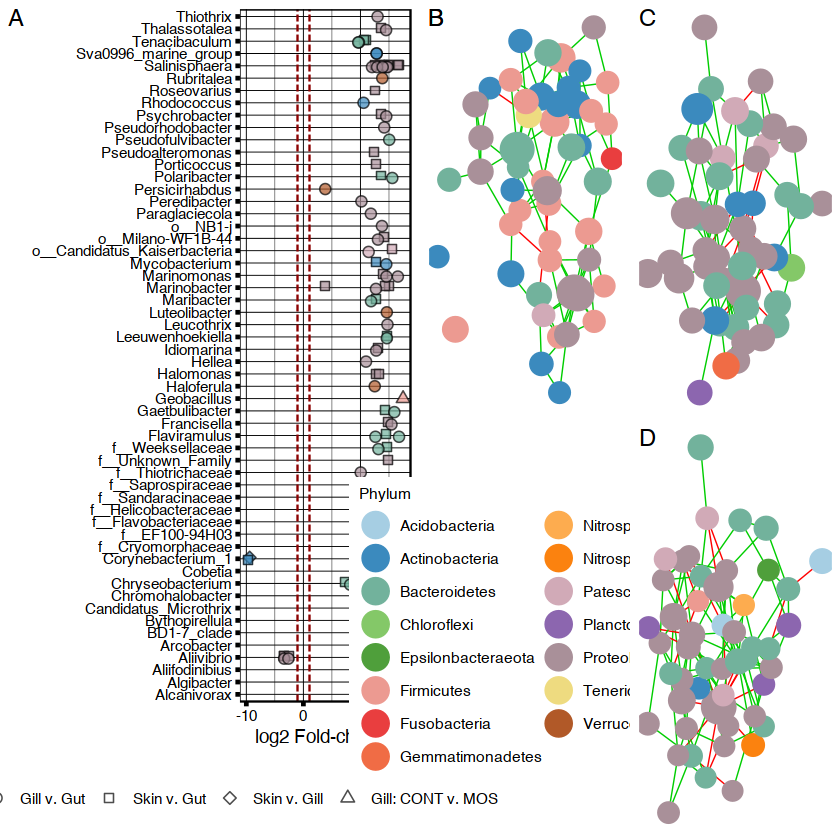

In [18]:
require(cowplot)
DAlfc <- readRDS('Figures/Manuscript/DA_LFC_Final.RDS')
DAlfc <- DAlfc 
leg1 <- get_legend(DAlfc)
leg2 <- get_legend(pGut + theme(legend.position='left'))
tisNets <- plot_grid(pGut + theme(legend.position="none"),
                     pGill + theme(legend.position='none'),
                     leg2,
                     pSkin + theme(legend.position='none'),
                     labels = c('B', 'C', '', 'D'))
DAplot <- plot_grid(DAlfc + theme(legend.position='none') + PhylumFillPalette, 
                    leg1,
                    ncol=1,
                    rel_heights=c(.9,.1))
plot_grid(DAplot,
          tisNets, 
          labels = 'AUTO')
ggsave('Figures/Manuscript/LFCnetworkMulti.png', bg='white', width=12)

### Determine number of edges and proportion of positive/negative interactions

In [19]:
betaMatFish=as.matrix(symBeta(getOptBeta(se.mb.Fish)))
positiveFish=length(betaMatFish[betaMatFish>0])/2
negativeFish=length(betaMatFish[betaMatFish<0])/2
totalFish=length(betaMatFish[betaMatFish!=0])/2

positiveFish
negativeFish
totalFish
scales::percent(positiveFish/totalFish, 0.1)

[1] 5749

[1] 212

[1] 5961

[1] "96.4%"

In [20]:
betaMatGut=as.matrix(symBeta(getOptBeta(se.mb.Gut)))
positiveGut=length(betaMatGut[betaMatGut>0])/2
negativeGut=length(betaMatGut[betaMatGut<0])/2
totalGut=length(betaMatGut[betaMatGut!=0])/2

positiveGut
negativeGut
totalGut
scales::percent(positiveGut/totalGut, 0.1)

[1] 600

[1] 14

[1] 614

[1] "97.7%"

In [21]:
betaMatGill=as.matrix(symBeta(getOptBeta(se.mb.Gill)))
positiveGill=length(betaMatGill[betaMatGill>0])/2
negativeGill=length(betaMatGill[betaMatGill<0])/2
totalGill=length(betaMatGill[betaMatGill!=0])/2

positiveGill
negativeGill
totalGill
scales::percent(positiveGill/totalGill, 0.1)

[1] 8646

[1] 1327

[1] 9973

[1] "86.7%"

In [22]:
betaMatSkin=as.matrix(symBeta(getOptBeta(se.mb.Skin)))
positiveSkin=length(betaMatSkin[betaMatSkin>0])/2
negativeSkin=length(betaMatSkin[betaMatSkin<0])/2
totalSkin=length(betaMatSkin[betaMatSkin!=0])/2

positiveSkin
negativeSkin
totalSkin
scales::percent(positiveSkin/totalSkin, 0.1)

[1] 6941

[1] 963

[1] 7904

[1] "87.8%"